<a href="https://colab.research.google.com/github/Haggin59/NNN/blob/main/001PyTorchWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch Workflow 

Daniel Bourke: https://youtu.be/V_xro1bcAuA

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.0+cu118'

### Data preparing and Loading

Data can be anything:
* CSV
* Images
* Videos
* Text
* Audio

Preparing data involves converting theese data inputs into a numerical representation and use a model to train on this data and predict patterns

Linear Regression

In [2]:
#Parameters
#y = mx + c

#here y = weight*x + bias

weight = 0.7
bias = 0.3

x = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight*x + bias

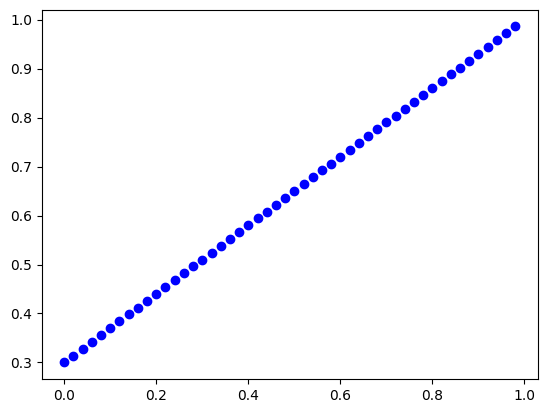

In [3]:
plt.plot(x,y,'bo')

Train, Validation, Test set split

* Training: 60-80%
* Validation 10-20%
* Test 10-20%

In [4]:
#Test,Train Split 80-20

train_split = int(0.8*len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]


In [18]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Function for plotting train, test data along with predictions
  """
  plt.figure()

  #Training data
  plt.scatter(train_data, train_labels, c='b', s=6, label="Training Data")

  #Test data
  plt.scatter(test_data, test_labels, c='g', s=6, label="Test Data")

  #Predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=6, label="Predictions")

  plt.legend()


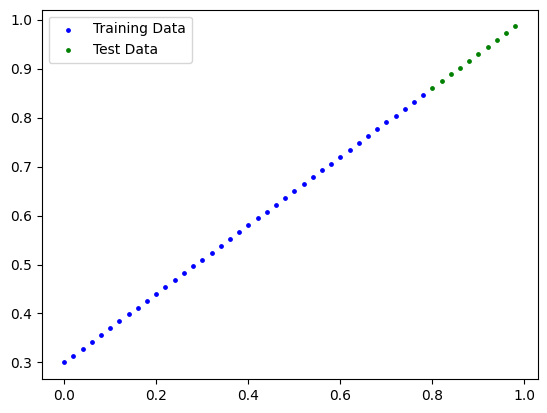

In [19]:
plot_predictions()

## Building the Model

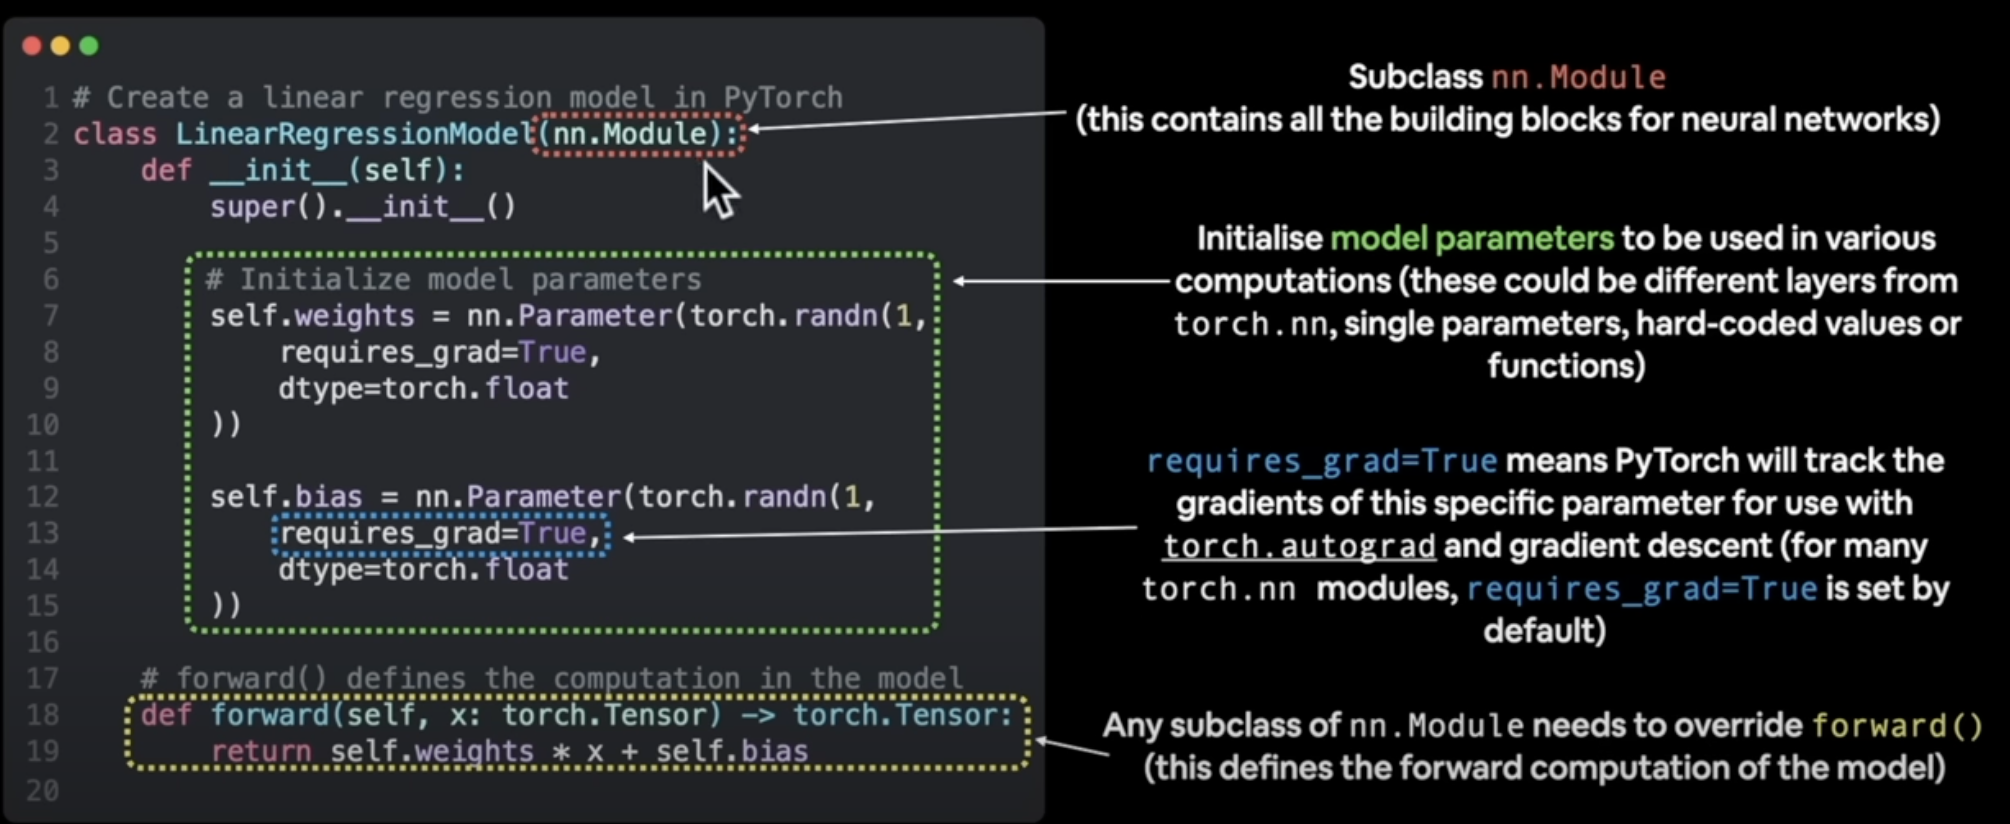

In [7]:
#linear regression model class

class LinearRegModel(nn.Module):
   def __init__(self):
      super().__init__()

      #Random weight and bias values
      self.weights = nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
      self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    #Forward method
   def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias #Linear regression


In [11]:
torch.manual_seed(42)

model_0 = LinearRegModel()

#model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
#Parameter names
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#Making predictions using `torch.inference_mode()`

when we pass data, the model is gonna pass it through `forward()`

* Inference mode is used to make predictons without using the grad() function.

* Similar results can be achieved using `torch.no_grad()` but `torch.inference_mode()` is preffered.

In [13]:
#making predictions

with torch.inference_mode():
  y_pred = model_0(x_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

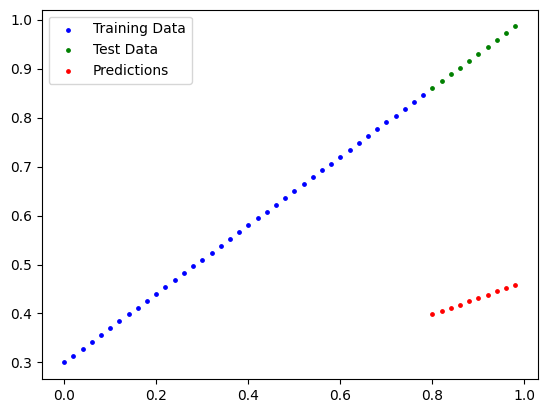

In [20]:
#Predictions with random parameters
plot_predictions(predictions=y_pred)